In [1]:
## AIRLINE PASSENGER SATISFACTION 
#DATA source: Kaggle
#REGRESSION type: LOGISTIC REGRESSION
 

In [2]:
# import all libraries needed here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix



In [3]:
df_2 = pd.read_csv('Invistico_Airline.csv')


In [4]:
df_2.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [5]:
df_2.tail()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0
129879,dissatisfied,Female,disloyal Customer,38,Personal Travel,Eco,4307,3,4,3,...,3,4,5,5,5,3,3,3,185,186.0


Information about Dataframe: 129880 rows and 23 columns
Information about columns:
       'satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'

In [6]:
df_2.index

RangeIndex(start=0, stop=129880, step=1)

In [7]:
df_2.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

### DATA WRANGLING / CLEANING THE DATA

In [8]:
#converting all letters to lower case 
df_2.columns=df_2.columns.str.replace('-','_')
df_2.columns =df_2.columns.str.lower()
df_2.columns=df_2.columns.str.replace(' ','_')
df_2.columns
print(df_2.columns)

Index(['satisfaction', 'gender', 'customer_type', 'age', 'type_of_travel',
       'class', 'flight_distance', 'seat_comfort',
       'departure/arrival_time_convenient', 'food_and_drink', 'gate_location',
       'inflight_wifi_service', 'inflight_entertainment', 'online_support',
       'ease_of_online_booking', 'on_board_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'cleanliness', 'online_boarding',
       'departure_delay_in_minutes', 'arrival_delay_in_minutes'],
      dtype='object')


In [9]:
## Renaming columns for better readability
#df_2.columns

rename_dict = {
    'type_of_travel': 'travel_type',
    'departure/arrival_time_convenient': 'departure_arrival_time_convenient',
    'ease_of_online_booking': 'online_booking',
    'on_board_service': 'onboard_service',
    'leg_room_service': 'leg_room',
    'departure_delay_in_minutes': 'departure_delay',
    'arrival_delay_in_minutes': 'arrival_delay',
    'Departure Delay in Minutes': 'departure_delay', 
    'food_and_drink': 'refreshments',
    'inflight_wifi_service': 'onboard_wifi'
}
df_2.rename(columns=rename_dict, inplace=True)

#df.drop(['departure/arrival_time_convenient',arrival_delay_in_minutes,inflight_entertainment,  ], axis=1, inplace=True)
#df_2_modified = df_2.rename(columns=rename_dict)
#df_3=df_2.copy()
#df_3.index
#df_3.columns
df_2.columns


Index(['satisfaction', 'gender', 'customer_type', 'age', 'travel_type',
       'class', 'flight_distance', 'seat_comfort',
       'departure_arrival_time_convenient', 'refreshments', 'gate_location',
       'onboard_wifi', 'inflight_entertainment', 'online_support',
       'online_booking', 'onboard_service', 'leg_room', 'baggage_handling',
       'checkin_service', 'cleanliness', 'online_boarding', 'departure_delay',
       'arrival_delay'],
      dtype='object')

In [10]:
#checking for null values
null_values = df_2.isnull().sum()
null_values

satisfaction                           0
gender                                 0
customer_type                          0
age                                    0
travel_type                            0
class                                  0
flight_distance                        0
seat_comfort                           0
departure_arrival_time_convenient      0
refreshments                           0
gate_location                          0
onboard_wifi                           0
inflight_entertainment                 0
online_support                         0
online_booking                         0
onboard_service                        0
leg_room                               0
baggage_handling                       0
checkin_service                        0
cleanliness                            0
online_boarding                        0
departure_delay                        0
arrival_delay                        393
dtype: int64

In [11]:
#filling in the 393 null-values with a numeric
## Impute missing values in 'Arrival Delay in Minutes' with its median
df_2['arrival_delay'].fillna(df_2['arrival_delay'].median(), inplace=True)

# Verify that there are no more missing values
print(df_2.isnull().sum())

satisfaction                         0
gender                               0
customer_type                        0
age                                  0
travel_type                          0
class                                0
flight_distance                      0
seat_comfort                         0
departure_arrival_time_convenient    0
refreshments                         0
gate_location                        0
onboard_wifi                         0
inflight_entertainment               0
online_support                       0
online_booking                       0
onboard_service                      0
leg_room                             0
baggage_handling                     0
checkin_service                      0
cleanliness                          0
online_boarding                      0
departure_delay                      0
arrival_delay                        0
dtype: int64


In [12]:
df_2.arrival_delay

0           0.0
1         305.0
2           0.0
3           0.0
4           0.0
          ...  
129875      0.0
129876    172.0
129877    163.0
129878    205.0
129879    186.0
Name: arrival_delay, Length: 129880, dtype: float64

In [13]:
rows_with_nulls = df_2.isnull().any(axis=1)
df_2_with_nulls = df_2[rows_with_nulls]

# Display the filtered DataFrame
print(df_2_with_nulls)

Empty DataFrame
Columns: [satisfaction, gender, customer_type, age, travel_type, class, flight_distance, seat_comfort, departure_arrival_time_convenient, refreshments, gate_location, onboard_wifi, inflight_entertainment, online_support, online_booking, onboard_service, leg_room, baggage_handling, checkin_service, cleanliness, online_boarding, departure_delay, arrival_delay]
Index: []

[0 rows x 23 columns]


In [14]:
#checking for na / nan values
has_na = df_2.isna().values.any()
print(has_na)  # Will print True if there are any NaN values, False otherwise
na_counts = df_2.isna().sum()
print(na_counts)


False
satisfaction                         0
gender                               0
customer_type                        0
age                                  0
travel_type                          0
class                                0
flight_distance                      0
seat_comfort                         0
departure_arrival_time_convenient    0
refreshments                         0
gate_location                        0
onboard_wifi                         0
inflight_entertainment               0
online_support                       0
online_booking                       0
onboard_service                      0
leg_room                             0
baggage_handling                     0
checkin_service                      0
cleanliness                          0
online_boarding                      0
departure_delay                      0
arrival_delay                        0
dtype: int64


In [15]:
#checking for null values in columns
null_values_count = df_2.isnull().sum()

# Display the count of null values for each column
print(null_values_count)

satisfaction                         0
gender                               0
customer_type                        0
age                                  0
travel_type                          0
class                                0
flight_distance                      0
seat_comfort                         0
departure_arrival_time_convenient    0
refreshments                         0
gate_location                        0
onboard_wifi                         0
inflight_entertainment               0
online_support                       0
online_booking                       0
onboard_service                      0
leg_room                             0
baggage_handling                     0
checkin_service                      0
cleanliness                          0
online_boarding                      0
departure_delay                      0
arrival_delay                        0
dtype: int64


In [16]:
#showing duplicates
duplicates = df_2.duplicated(keep=False)

# Filter the DataFrame to show only duplicate rows
duplicate_rows = df_2[duplicates]

# Display the duplicate rows
print(duplicate_rows)

df_2.drop_duplicates(inplace=True)

Empty DataFrame
Columns: [satisfaction, gender, customer_type, age, travel_type, class, flight_distance, seat_comfort, departure_arrival_time_convenient, refreshments, gate_location, onboard_wifi, inflight_entertainment, online_support, online_booking, onboard_service, leg_room, baggage_handling, checkin_service, cleanliness, online_boarding, departure_delay, arrival_delay]
Index: []

[0 rows x 23 columns]


In [17]:
df_2.shape

(129880, 23)

 ## Data Preprocessing
 ### Checking for outliers
 ### Using Frequency Analysis Distribution since handling categorical values
 

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example for a single numerical column
for column in df_2.select_dtypes(include=['object', 'category']).columns:
    print(df_2[column].value_counts())
    print("\n")

satisfaction
satisfied       71087
dissatisfied    58793
Name: count, dtype: int64


gender
Female    65899
Male      63981
Name: count, dtype: int64


customer_type
Loyal Customer       106100
disloyal Customer     23780
Name: count, dtype: int64


travel_type
Business travel    89693
Personal Travel    40187
Name: count, dtype: int64


class
Business    62160
Eco         58309
Eco Plus     9411
Name: count, dtype: int64




### Data Consistency Check

In [19]:
# Applying to a single categorical column
print(df_2['satisfaction'].unique())
print(df_2['gender'].unique())
print(df_2['customer_type'].unique())
print(df_2['travel_type'].unique())
print(df_2['class'].unique())
# Select only categorical columns (you might adjust this based on how your categorical data is represented)
#categorical_columns = df_3.select_dtypes(include=['satisfaction', 'category']).columns

# Select only categorical columns (you might adjust this based on how your categorical data is represented)
#categorical_columns = df_3.select_dtypes(include=['customer_type', 'travel_type', 'class', 'gender']).columns

# Loop through each categorical column and print unique values to check for consistency
#for column in categorical_columns:
    #print(f"Unique values in '{column}':")
    #print(sorted(df_3[column].unique()))  # Using sorted to list the values in a consistent order
    #print("\n")

['satisfied' 'dissatisfied']
['Female' 'Male']
['Loyal Customer' 'disloyal Customer']
['Personal Travel' 'Business travel']
['Eco' 'Business' 'Eco Plus']


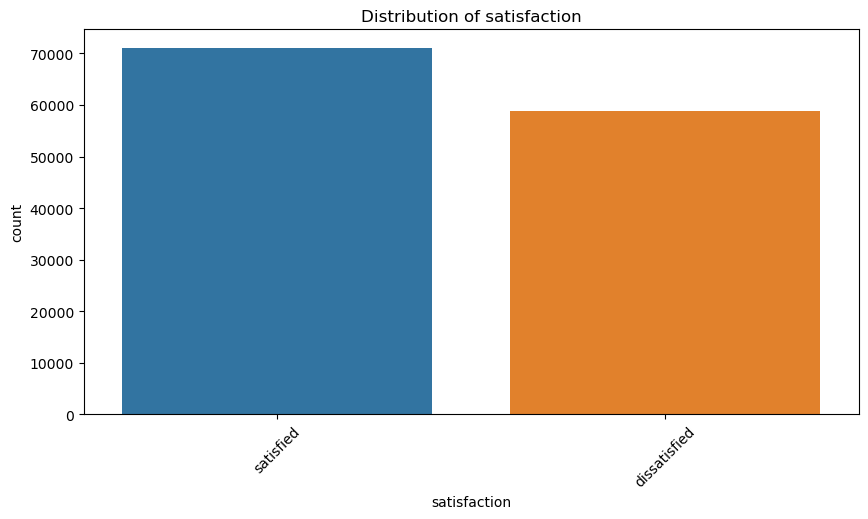

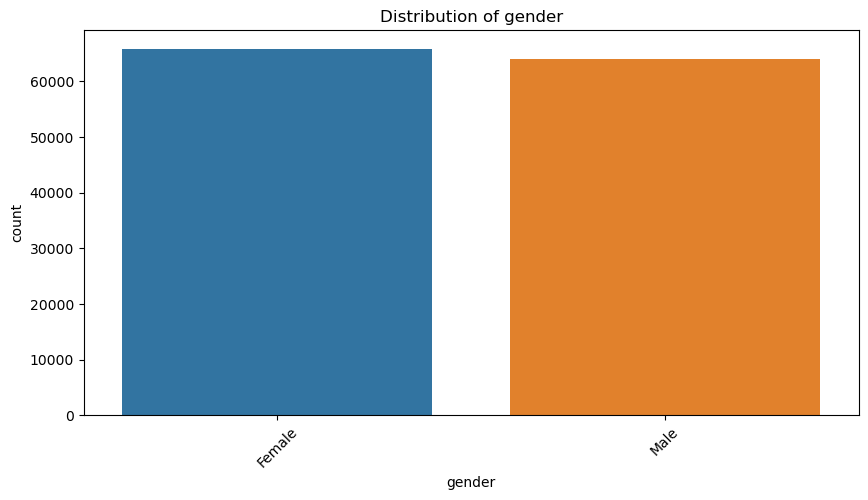

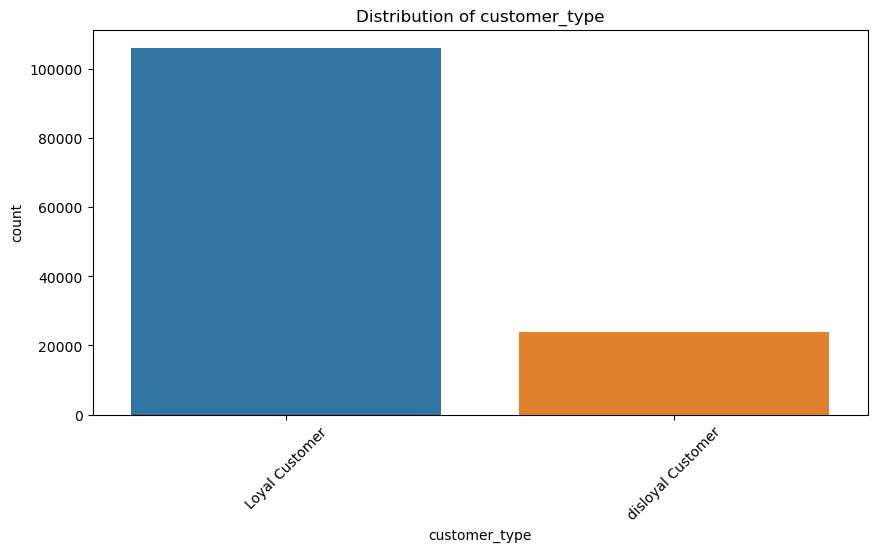

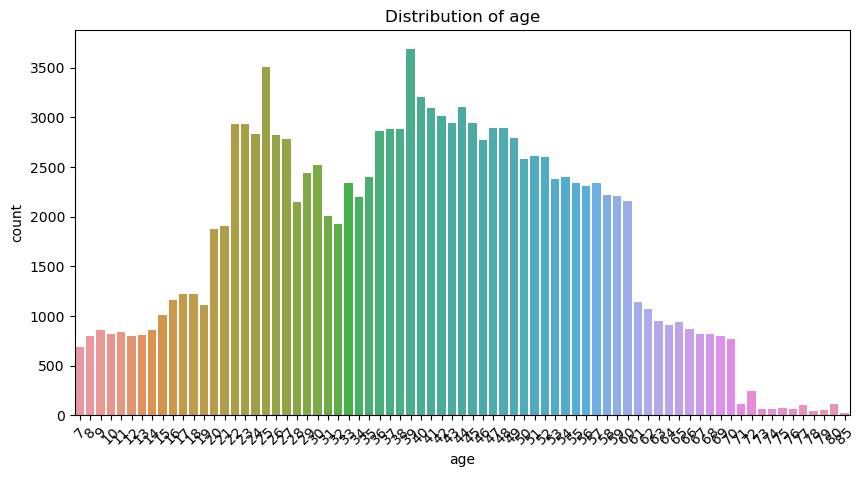

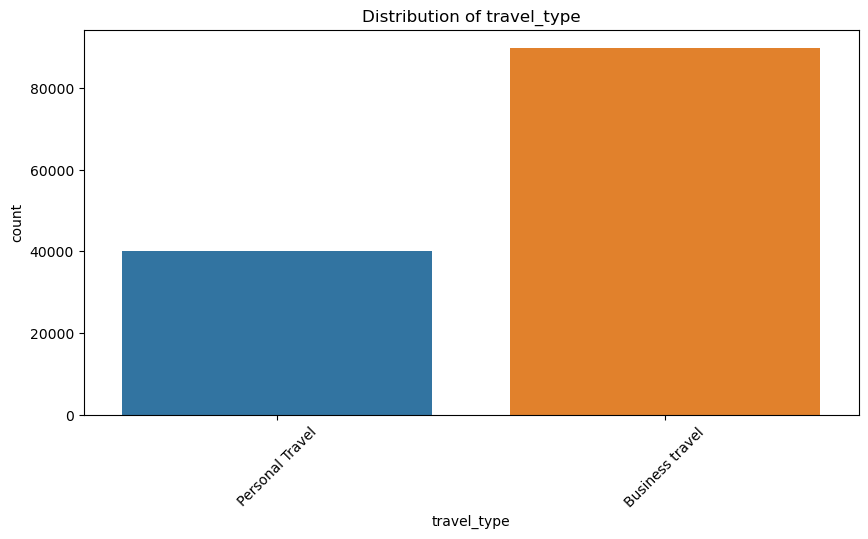

In [20]:
# For this categorical data, bar charts or count plots will be insightful.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Defining the list of columns  to perform EDA on
categorical_columns = ['satisfaction', 'gender', 'customer_type', 'age', 'travel_type']

# Plotting of above - chosen categorical variables
for column in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=column, data=df_2)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()

### Converting categorical variables into numeric. 
### In this case, the values are nominal since no intrinsic order, hence using One-Hot Encoding

### Converting the column 'satisfaction' into a numeric value

In [21]:
#importing more libraries for use:
from sklearn.preprocessing import OneHotEncoder 

In [22]:
df_2['satisfaction'] = OneHotEncoder(drop='first').fit_transform(df_2[['satisfaction']]).toarray()
df_2.head()

,satisfaction,gender,customer_type,age,travel_type,class,flight_distance,seat_comfort,departure_arrival_time_convenient,refreshments,...,online_support,online_booking,onboard_service,leg_room,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay,arrival_delay
0,1.0,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,1.0,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,1.0,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,1.0,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,1.0,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [23]:
df_2.tail()

,satisfaction,gender,customer_type,age,travel_type,class,flight_distance,seat_comfort,departure_arrival_time_convenient,refreshments,...,online_support,online_booking,onboard_service,leg_room,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay,arrival_delay
129875,1.0,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,0.0,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,0.0,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,0.0,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0
129879,0.0,Female,disloyal Customer,38,Personal Travel,Eco,4307,3,4,3,...,3,4,5,5,5,3,3,3,185,186.0


### Splitting the data up to perform training and testing 

In [24]:
X = df_2[['online_booking']]
y = df_2['satisfaction']
#training with 70 / 30
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [51]:
clf = LogisticRegression().fit(X_train,y_train)

In [26]:
clf.coef_

array([[0.75552539]])

In [27]:
clf.intercept_

array([-2.43043036])

In [50]:
#training with 80/20
X = df_2[['online_booking']]
y = df_2['satisfaction']

#training with 70 / 30
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
clf = LogisticRegression().fit(X_train,y_train)
clf.coef_
clf.intercept_

array([-2.41342683])

In [29]:
# # Importing the necessary libraries needed in the visualization

import matplotlib.pyplot as plt
import seaborn as sns


<Axes: xlabel='satisfaction', ylabel='count'>

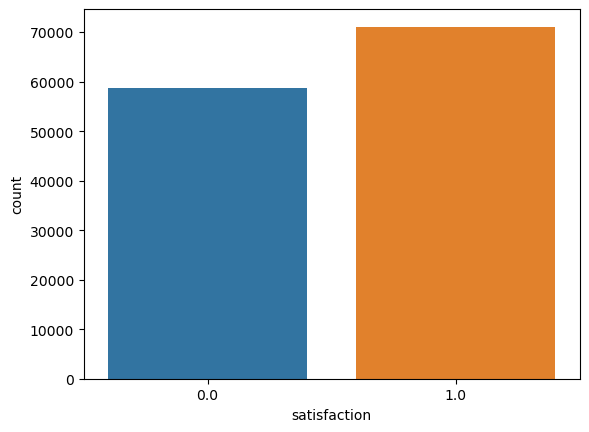

In [30]:
sns.countplot(x='satisfaction',data=df_2)

<Axes: xlabel='online_booking', ylabel='count'>

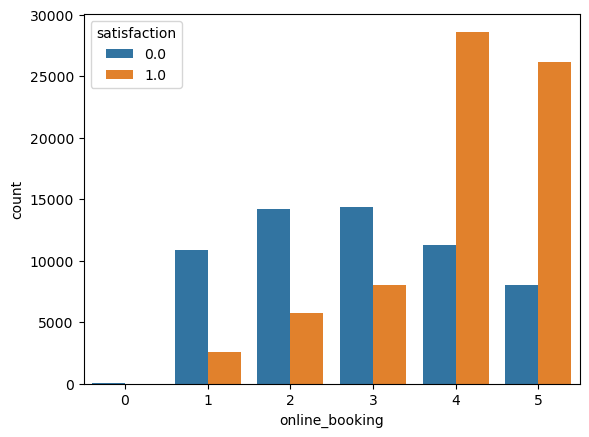

In [31]:
sns.countplot(x='online_booking',data=df_2, hue ='satisfaction')

In [32]:
df_2.columns

Index(['satisfaction', 'gender', 'customer_type', 'age', 'travel_type',
       'class', 'flight_distance', 'seat_comfort',
       'departure_arrival_time_convenient', 'refreshments', 'gate_location',
       'onboard_wifi', 'inflight_entertainment', 'online_support',
       'online_booking', 'onboard_service', 'leg_room', 'baggage_handling',
       'checkin_service', 'cleanliness', 'online_boarding', 'departure_delay',
       'arrival_delay'],
      dtype='object')

<Axes: xlabel='online_booking', ylabel='satisfaction'>

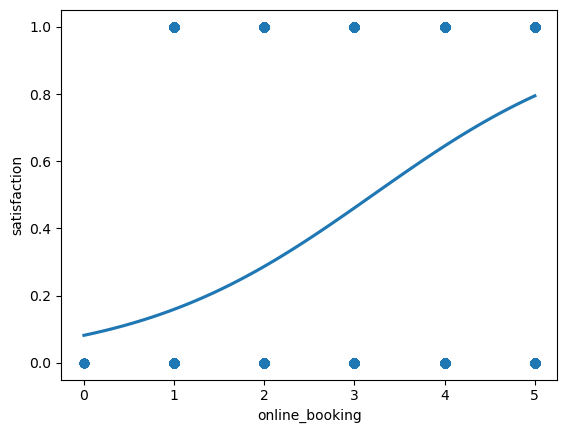

In [33]:

sns.regplot(x='online_booking', y='satisfaction', data=df_2, logistic=True, ci=None)

 Graph sort of confirms that a better online booking possiblity increases the satisfaction of the customers 

### Using the values given above, a prediction of the data set is initiated


In [34]:
## This line below uses the trained classifier clf to predict the class labels 
#for the test set X_test. The output y_pred contains the predicted labels,
#where 1 represents one class (often "positive" or the presence of a condition)
#and 0 represents the other class 
#(often "negative" or the absence of a condition).

In [35]:
y_pred = clf.predict(X_test)
print (y_pred)

[1. 1. 1. ... 1. 0. 0.]


In [36]:
# the probability on the X-test with PREDICT_PROBA
clf.predict_proba(X_test)

array([[0.35602408, 0.64397592],
       [0.35602408, 0.64397592],
       [0.35602408, 0.64397592],
       ...,
       [0.35602408, 0.64397592],
       [0.53963156, 0.46036844],
       [0.84049348, 0.15950652]])

In [37]:
# with the use of PREDICT the outputs of 1s and 0s are achieved 
clf.predict(X_test)

array([1., 1., 1., ..., 1., 0., 0.])

In [38]:
import sklearn.metrics as metrics

In [39]:
# Running an analysis of all results
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred))

Accuracy: 0.726363
Precision: 0.742270
Recall: 0.770506
F1 Score: 0.756124


In [40]:
##Metrics
#Accuracy: This is the ratio of correctly predicted observations to the total observations.
#It gives you the fraction of the total number of correct predictions.

#Precision: This is the ratio of correctly predicted positive observations to the 
#total predicted positives. It is a measure of the quality of the positive class predictions.

#Recall (Sensitivity): This is the ratio of correctly predicted 
#positive observations to all observations in the actual class. It measures how well 
#the model can find the positive instances.

#F1 Score: This is the weighted average of Precision and Recall.
#It takes both false positives and false negatives into account.
#An F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0.

In [42]:
# Precision results are alright given model selected and available data.
 #Accuracy can be further increade by using other ML models
 #Precision is calculated as the ratio of corrctly predicted positive observations
 #Recall is the ratio of correctly predicted positive observations in actual class
 #F1-score is the weighted average of precision and recall

# Making use of the CONFUSION MATRIX, BUILDING AND EVALUATING IT

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
from sklearn.metrics import confusion_matrix

In [ ]:
# Handle missing values
df_2['arrival_delay'].fillna(df_2['arrival_delay'].median(), inplace=True)

# Encode categorical variables and the target variable
df_2_encoded = pd.get_dummies(df_2, columns=['gender', 'customer_type', 'travel_type', 'class'])
label_encoder = LabelEncoder()
df_2_encoded['satisfaction'] = label_encoder.fit_transform(df_2_encoded['satisfaction'])

In [ ]:
# Define features and target
X = df_2_encoded.drop('satisfaction', axis=1)
y = df_2_encoded['satisfaction']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define and train the logistic regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)

In [ ]:
# Make predictions
y_pred = logistic_model.predict(X_test_scaled)


In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix: \n{conf_matrix}")
print(f"Classification Report: \n{class_report}")


In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred, labels = clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf.classes_)
disp.plot()

In [ ]:
#True negatives (TN): The count of actual "No" instances correctly predicted as "No."
#False positives (FP): The count of actual "No" instances incorrectly predicted as "Yes."
#False negatives (FN): The count of actual "Yes" instances incorrectly predicted as "No."
#True positives (TP): The count of actual "Yes" instances correctly predicted as "Yes."

In [ ]:
### Key insights: 
###Two of the quadrants are under 4,000, which are relatively low numbers.
###Additionally, the other two quadrants—the true positives and true negatives—are both high numbers ###above 13,000.
###There isn't a large difference in the number of false positives and false negatives.